In [314]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.wcs import WCS
plt.style.use(astropy_mpl_style)

In [315]:
diffim = get_pkg_data_filename('diff_Files-part1/ztf_20200206287824_000819_zg_c13_o_q2_scimrefdiffimg.fits')

In [316]:
with fits.open(diffim) as hdu:

    science_data1 = hdu[1].data
    science_header1 = hdu[1].header

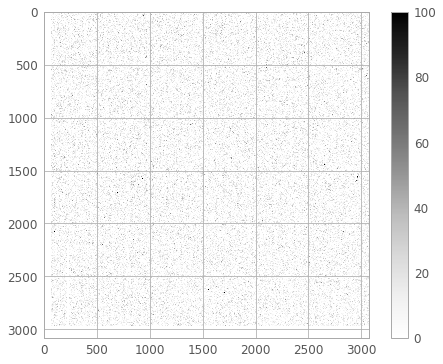

In [317]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.colorbar()

In [318]:
science_data1.shape

(3080, 3072)

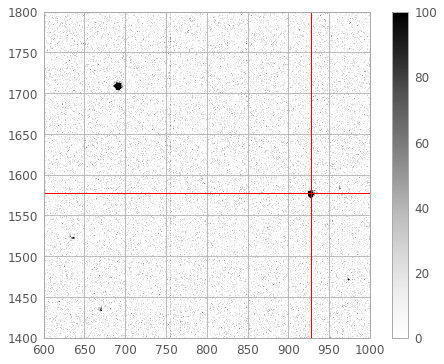

In [319]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.xlim(600,1000)
plt.ylim(1400,1800)
plt.vlines(928, 0, 2000, color='r', lw=1)
plt.hlines(1577, 0, 2000, color='r', lw=1)
plt.colorbar()

In [320]:
w = WCS(science_header1)
tra, tdec = w.wcs_pix2world(928., 1577., 1)
print(tra, tdec)

186.08957740114806 65.31211780184103


In [321]:
ralim, declim = w.wcs_pix2world([0,science_data1.shape[0]], [0,science_data1.shape[1]], 1)
print(ralim, declim)

[186.82591419 184.57051682] [65.72671021 64.94409859]


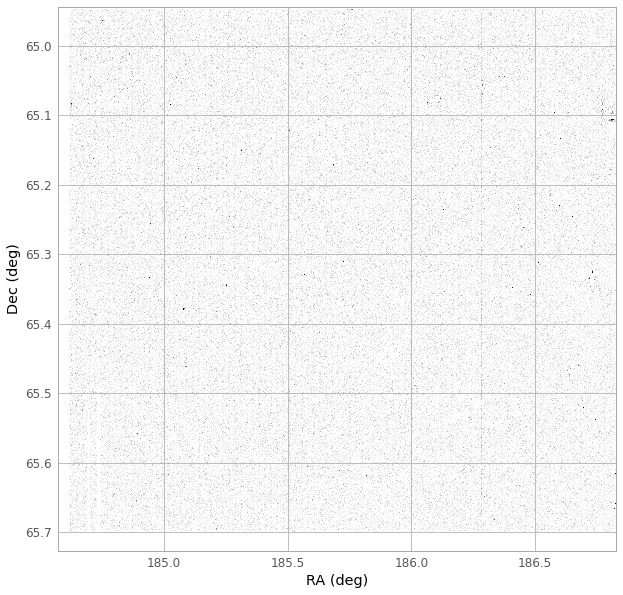

In [322]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(science_data1, interpolation='none', cmap='Greys', 
          extent = [ralim[1], ralim[0], declim[0], declim[1]], clim = (0,100), aspect='auto')

plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)");

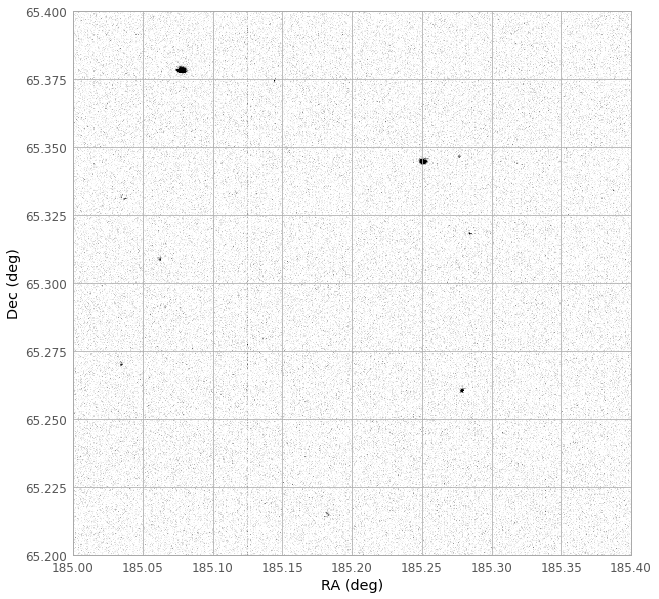

In [323]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(science_data1, interpolation='none', cmap='Greys', 
          extent = [ralim[1], ralim[0], declim[0], declim[1]], clim = (0,100), aspect='auto')

plt.xlim(185.0,185.4)
plt.ylim(65.2,65.4)

plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)");

## SExtractor Catalogs

In [324]:
refdf = pd.read_table('~/ztfsex/ref.cat', names=['NUMBER',
'X_IMAGE',
'Y_IMAGE',
'XWIN_IMAGE',
'YWIN_IMAGE',
'XMODEL_IMAGE',
'YMODEL_IMAGE',
'FLUX_AUTO',
'FLUX_MODEL',
'MAG_AUTO',
'MAG_MODEL',
'FLUX_RADIUS',
'FLAGS',
'NITER_MODEL',
'ALPHA_SKY',
'DELTA_SKY',
'THETA_WORLD'], skiprows=17, delim_whitespace=True)

diffdf = pd.read_table('~/ztfsex/diff.cat', names=['NUMBER',
'X_IMAGE',
'Y_IMAGE',
'XWIN_IMAGE',
'YWIN_IMAGE',
'XMODEL_IMAGE',
'YMODEL_IMAGE',
'FLUX_AUTO',
'FLUX_MODEL',
'MAG_AUTO',
'MAG_MODEL',
'FLUX_RADIUS',
'FLAGS',
'NITER_MODEL',
'ALPHA_SKY',
'DELTA_SKY',
'THETA_WORLD'], skiprows=17, delim_whitespace=True)


In [325]:
refdf

,NUMBER,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD
0,1,106.1428,81.5823,106.1452,81.3903,106.1212,81.4162,9459.741,9587.694,-9.9397,-9.9543,1.546,0,114,186.004494,65.363059,-79.31
1,2,366.5318,475.0735,366.5468,474.8824,366.5516,474.9395,9210.522,9386.072,-9.9107,-9.9312,1.533,0,73,186.151767,65.247332,-71.70
2,3,439.6944,402.0551,439.7159,401.9519,439.7075,401.9770,2849.034,3015.146,-8.6367,-8.6983,1.487,0,59,186.204808,65.265540,-83.62
3,4,490.2754,385.4096,490.3217,385.1494,490.3707,385.4651,201069.200,177137.400,-13.2584,-13.1208,1.570,16,56,186.239311,65.268764,63.42
4,5,269.2091,326.6755,269.2364,326.5275,269.2369,326.5318,4804.375,5038.203,-9.2041,-9.2557,1.516,0,74,186.096959,65.290970,-61.30
5,6,493.4649,289.8722,493.4646,289.7093,493.4717,289.7839,7324.532,8079.649,-9.6620,-9.7685,1.537,16,39,186.247664,65.295086,-74.42
6,7,142.5566,277.9377,142.5443,277.7582,142.5470,277.8408,7463.265,7670.281,-9.6823,-9.7120,1.499,0,37,186.016245,65.307804,-78.39
7,8,213.5133,259.2403,213.5415,259.0061,213.5115,259.1134,39865.780,40065.550,-11.5015,-11.5069,1.560,0,41,186.064400,65.311098,62.72
8,9,251.4941,251.2800,251.4810,251.1410,251.4924,251.1766,3027.074,3423.042,-8.7026,-8.8360,1.532,0,30,186.090049,65.312288,-72.39
9,10,109.7536,221.5978,109.8383,221.6419,109.8643,221.6583,1915.659,1932.917,-8.2058,-8.2155,3.215,0,35,185.998072,65.324246,-40.14


In [326]:
diffdf

,NUMBER,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD
0,1,503.1211,1529.0396,503.3874,1528.2999,503.2475,1528.6663,4.699205e+03,10036.75,-9.1801,-10.0040,1.027,0,91,186.377628,65.313782,-88.18
1,2,927.4387,1576.5729,927.3816,1576.4155,927.3794,1576.4317,1.628588e+04,16488.29,-10.5295,-10.5429,1.990,0,33,186.089982,65.312222,-52.44
2,3,691.5524,1708.4601,691.5854,1708.1253,691.5716,1708.2406,2.595288e+04,25765.61,-11.0355,-11.0276,2.323,0,37,186.239340,65.268843,-79.67
3,4,10.9789,1439.4927,10.9789,1439.4926,0.0000,0.0000,1.115040e+07,0.00,-17.6182,99.0000,4904.597,56,0,186.713762,65.324525,83.89
4,5,72.3022,1314.5347,72.3022,1314.5347,0.0000,0.0000,-1.138748e+05,0.00,99.0000,99.0000,0.000,51,0,186.681574,65.361301,83.69
5,6,72.1534,327.3397,72.1534,327.3397,0.0000,0.0000,0.000000e+00,0.00,99.0000,99.0000,0.000,50,0,186.752896,65.637381,83.89
6,7,67.7209,2372.9482,67.7209,2372.9483,67.7254,2372.9485,-1.889692e+06,102652.30,99.0000,-12.5284,58.620,51,10,186.609800,65.065114,83.81
7,8,3066.4312,2842.2798,3066.2940,2842.3675,3066.2271,2842.4694,7.773965e+03,13576.48,-9.7266,-10.3320,1.132,16,36,184.590684,65.008257,39.86
8,9,2886.7805,2959.8325,2860.7589,2943.0817,2958.0667,2949.3649,1.436353e+07,26716970.00,-17.8932,-18.5670,141.568,19,144,184.704064,64.971562,-1.38
9,10,2231.6165,2960.6719,2109.2412,2974.6742,2231.3947,2958.9824,2.652745e+07,27308610.00,-18.5592,-18.5907,303.428,19,43,185.138249,64.956944,-3.04


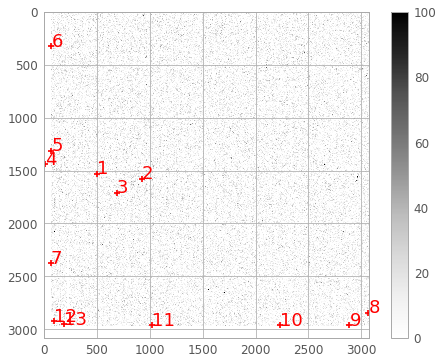

In [327]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.colorbar()

plt.scatter(diffdf["X_IMAGE"]-1, diffdf["Y_IMAGE"]-1, color='r', marker='+')
for i,txt in enumerate(diffdf["NUMBER"].values):
    plt.annotate(txt, (diffdf["X_IMAGE"].values[i], diffdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

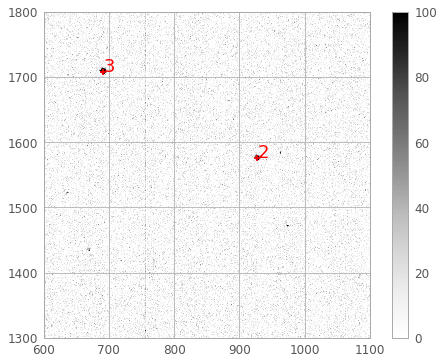

In [328]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.xlim(600,1100)
plt.ylim(1300,1800)
plt.colorbar()

plt.scatter(diffdf["X_IMAGE"]-1, diffdf["Y_IMAGE"]-1, color='r', marker='+')
for i,txt in enumerate(diffdf["NUMBER"].values):
    plt.annotate(txt, (diffdf["X_IMAGE"].values[i], diffdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

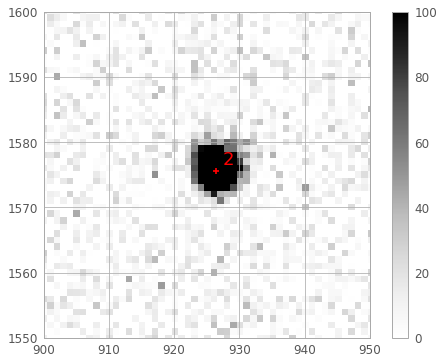

In [329]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.xlim(900,950)
plt.ylim(1550,1600)
plt.colorbar()

plt.scatter(diffdf["X_IMAGE"]-1, diffdf["Y_IMAGE"]-1, color='r', marker='+')
for i,txt in enumerate(diffdf["NUMBER"].values):
    plt.annotate(txt, (diffdf["X_IMAGE"].values[i], diffdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

In [330]:
with fits.open('diff_Files-part1/ztfref.fits') as hdu:

    ref_data1 = hdu[0].data
    ref_header1 = hdu[0].header

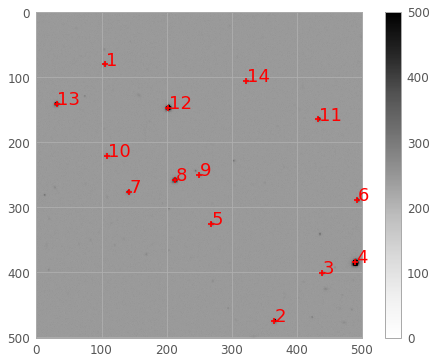

In [331]:
plt.figure()
plt.imshow(ref_data1, interpolation='none', cmap='Greys', clim=(0,500))
plt.colorbar()
plt.scatter(refdf["X_IMAGE"]-1, refdf["Y_IMAGE"]-1, color='r', marker='+')

for i,txt in enumerate(refdf["NUMBER"].values):
    plt.annotate(txt, (refdf["X_IMAGE"].values[i], refdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

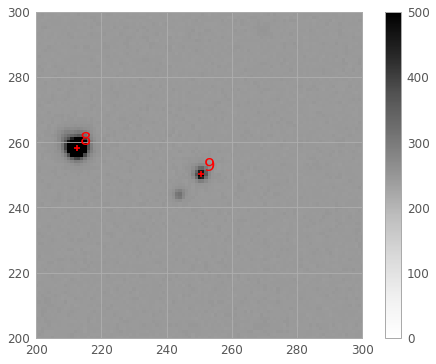

In [332]:
plt.figure()
plt.imshow(ref_data1, interpolation='none', cmap='Greys', clim=(0,500))
plt.colorbar()
plt.scatter(refdf["X_IMAGE"]-1, refdf["Y_IMAGE"]-1, color='r', marker='+')

for i,txt in enumerate(refdf["NUMBER"].values):
    plt.annotate(txt, (refdf["X_IMAGE"].values[i], refdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

plt.xlim(200,300)
plt.ylim(200,300);


### Finding Zenith Angle

We can use some astropy tools to find the icrs coordinates of the observation zenith and compare the zenith-catalogue position angle and the catalogue-diffimg position angle

In [333]:
mtn = EarthLocation.of_site('Palomar')
mjd = Time(58885.28807871, format='mjd')

zenith = SkyCoord(AltAz(alt=90 * u.degree, az=0 * u.degree, obstime = mjd, location=mtn)).transform_to(ICRS())
zenith

<SkyCoord (ICRS): (ra, dec) in deg
    (122.40839441, 33.41638728)>

In [334]:
cata = SkyCoord(refdf["ALPHA_SKY"][refdf["NUMBER"] == 9].values * u.degree, 
                refdf["DELTA_SKY"][refdf["NUMBER"] == 9].values * u.degree, frame='icrs')
diff = SkyCoord(diffdf["ALPHA_SKY"][diffdf["NUMBER"] == 2].values * u.degree, 
                diffdf["DELTA_SKY"][diffdf["NUMBER"] == 2].values * u.degree, frame='icrs')

[29.69768519]
[29.6977668]


In [335]:
print("Difference in position angle = {} arcsec".format(
zenith.position_angle(cata).arcsecond - zenith.position_angle(diff).arcsecond))

Difference in position angle = [-0.2937797] arcsec


### Separation Stats

In [629]:
import importlib
import ztf_shift_stats
importlib.reload(ztf_shift_stats)
from ztf_shift_stats import *


https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0411/467847/ztf_20180411467847_000535_zr_c11_o_q3_sciimg.fits



In [590]:
getsciimg(filefracday='20200206287824', paddedfield='000819',filtercode = 'zg',paddedccdid = '13',imgtypecode ='o', qid = '2', flip=False)
getrefimg(paddedfield='000819',filtercode = 'zg',paddedccdid = '13', qid = '2')

In [630]:
sci_cata = srcext('20200206287824_000819_sciimg.fits', det_thresh=15, ana_thresh=15)

/Users/Riley/Desktop/Flarubin
20200206287824_000819_sciimg.fits
True
/Users/Riley/Desktop/Flarubin/srcext


> 
----- SExtractor 2.19.5 started on 2022-03-03 at 16:06:35 with 1 thread

> Setting catalog parameters
> Reading PSF information
> Preparing profile models
Fitting model: Sersic spheroid
> Reading detection filter
> Initializing check-image(s)
> Initializing catalog
> Looking for 20200206287824_000819_sciimg.fits
----- Measuring from: 20200206287824_000819_sciimg.fits
      "Unnamed" / no ext. header / 3072x3080 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
>

In [631]:
ref_cata = srcext('000819_refimg.fits', det_thresh=15, ana_thresh=15)

/Users/Riley/Desktop/Flarubin
000819_refimg.fits
True
/Users/Riley/Desktop/Flarubin/srcext


> 
----- SExtractor 2.19.5 started on 2022-03-03 at 16:07:30 with 1 thread

> Setting catalog parameters
> Reading PSF information
> Preparing profile models
Fitting model: Sersic spheroid
> Reading detection filter
> Initializing check-image(s)
> Initializing catalog
> Looking for 000819_refimg.fits
----- Measuring from: 000819_refimg.fits
      "Unnamed" / no ext. header / 3200x3200 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
> Setting up background map at 

In [632]:
sci_cata.head()

,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD,ELLIPTICITY
NUMBER,,,,,,,,,,,,,,,,,
1,1619.8564,2.2303,1619.3916,1.7572,1618.9135,-0.9282,114061.60,492387.00,-12.6428,-14.2308,2.605,24,54,185.721921,65.771153,-3.28,0.589
2,430.8217,52.1687,430.8111,52.1175,430.8046,52.1208,27403.37,28232.34,-11.0945,-11.1269,2.019,0,33,186.528985,65.724892,-35.34,0.058
3,246.5681,76.7028,246.4967,76.4673,246.5245,76.5483,365680.60,369706.70,-13.9078,-13.9196,2.042,0,47,186.652593,65.712645,88.44,0.033
4,1568.8157,125.3370,1568.7726,125.1708,1568.7711,125.1984,75844.66,77804.44,-12.1998,-12.2275,1.997,0,34,185.749026,65.735395,-65.77,0.041
5,883.0072,127.9156,883.0111,127.8498,883.0036,127.8526,26204.86,27868.56,-11.0460,-11.1128,2.006,0,38,186.215980,65.716485,-59.94,0.018


In [633]:
ref_cata.head()

,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD,ELLIPTICITY
NUMBER,,,,,,,,,,,,,,,,,
1,264.0418,74.9009,264.0797,74.6049,264.0491,74.8932,212460.200,195239.20,-13.3182,-13.2264,1.597,0,60,184.842425,65.816773,63.78,0.047
2,2962.4246,70.0766,2962.4949,69.8881,2962.5051,69.9745,13044.330,13431.35,-10.2886,-10.3203,1.592,0,54,186.662531,65.750166,-28.71,0.036
3,2999.9924,58.6568,3000.1409,57.0009,3000.4942,53.3900,8462.265,84621.73,-9.8187,-12.3187,3.013,17,124,186.688609,65.752222,-6.02,0.719
4,823.3461,59.5305,823.4457,58.4326,823.4520,56.4702,4703.413,15388.57,-9.1810,-10.4680,5.308,17,33,185.221231,65.808723,-5.86,0.768
5,1659.8218,81.9015,1659.8600,81.6223,1659.8319,81.8822,55255.910,51991.50,-11.8559,-11.7898,1.582,0,54,185.784494,65.782393,69.88,0.044


In [634]:
print(sci_cata.shape, ref_cata.shape)

(154, 17) (483, 17)


In [635]:
with fits.open('srcext/20200206287824_000819_sciimg.fits') as hdu:
    sci_data = hdu[0].data
    sci_header = hdu[0].header

with fits.open('srcext/000819_refimg.fits') as hdu:
    ref_data = hdu[0].data
    ref_header = hdu[0].header

In [636]:
print(sci_data.shape)
print(ref_data.shape)

(3080, 3072)
(3200, 3200)


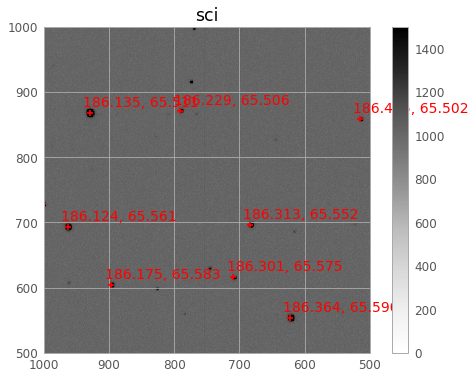

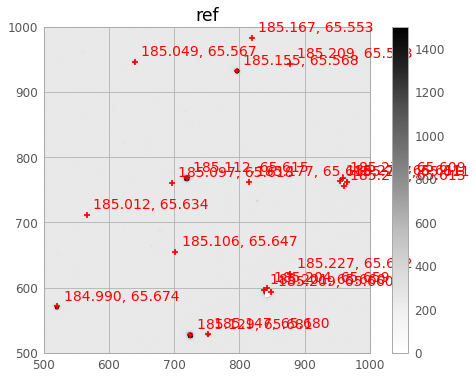

In [637]:
annotate=True

images = {"sci":sci_data, "ref":ref_data}
cats = {"sci":sci_cata, "ref":ref_cata}
it = "sci"

for it in ["sci", "ref"]:
    plt.figure()
    plt.imshow(images[it], interpolation='none', origin='lower', cmap='Greys', clim=(0,1500))
    plt.colorbar()
    plt.xlim(500,1000)
    plt.ylim(500,1000)

    plt.title(it)

    if it == "sci":
        plt.gca().invert_xaxis()

    if annotate:
        plt.scatter(cats[it]["X_IMAGE"], cats[it]["Y_IMAGE"], color='r', marker='+')
        for i in range(len(cats[it]["X_IMAGE"])):
            plt.annotate('{0:.3f}, {1:.3f}'.format(cats[it]["ALPHA_SKY"].values[i], cats[it]["DELTA_SKY"].values[i]), 
            (cats[it]["X_IMAGE"].values[i]+10, cats[it]["Y_IMAGE"].values[i]+10), color='r', fontsize=14)




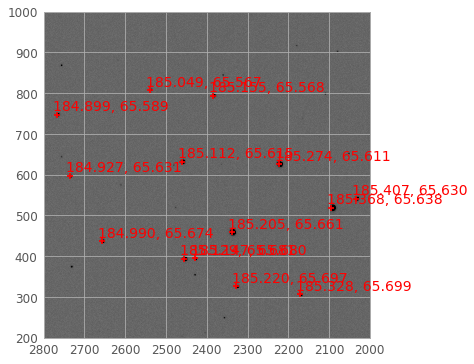

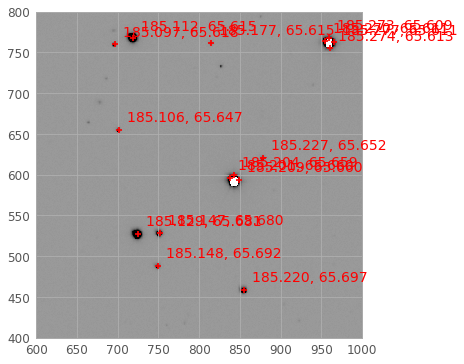

In [674]:
plt.imshow(sci_data, interpolation='none', cmap='Greys', clim=(0,1500))
plt.xlim(2000,2800)
plt.ylim(200,1000)
plt.scatter(sci_cata["X_IMAGE"], sci_cata["Y_IMAGE"], color='r', marker='+')
for i in range(len(sci_cata["X_IMAGE"])):
    plt.annotate('{0:.3f}, {1:.3f}'.format(sci_cata["ALPHA_SKY"].values[i], sci_cata["DELTA_SKY"].values[i]), 
    (sci_cata["X_IMAGE"].values[i]+10, sci_cata["Y_IMAGE"].values[i]+10), color='r', fontsize=14)
plt.gca().invert_xaxis()
plt.show()

plt.imshow(ref_data, interpolation='none', cmap='Greys', clim=(0,500))
plt.xlim(600,1000)
plt.ylim(400,800)
plt.scatter(ref_cata["X_IMAGE"], ref_cata["Y_IMAGE"], color='r', marker='+')
for i in range(len(ref_cata["X_IMAGE"])):
    plt.annotate('{0:.3f}, {1:.3f}'.format(ref_cata["ALPHA_SKY"].values[i], ref_cata["DELTA_SKY"].values[i]), 
    (ref_cata["X_IMAGE"].values[i]+10, ref_cata["Y_IMAGE"].values[i]+10), color='r', fontsize=14)

In [645]:
ind, d2d, d3d = xmatch(sci_cata,ref_cata)

In [646]:
print(ind, d2d, d3d)

[ 12  20  21  27  29  30  32  38  41  46  56  59  61  63  69  71  74  73
  76  82  79  83  86  95  97  99 100 102 113 111 116 118 117 121 123 136
 137 138 141 142 144 150 147 146 152 157 166 165 180 171 167 174 179 187
 203 200 202 207 208 210 213 217 220 221 222 224 227 229 230 231 232 235
 236 238 241 243 245 246 257 258 259 261 269 267 278 279 280 281 283 285
 290 288 289 300 292 296 300 306 310 314 319 323 324 326 328 336 337 348
 356 357 354 359 392 451 448 390 476 470 453 452 428 398 464 380 368 391
 381 370 400 369 395 389 396 379 415 470 378 401 473 419 361 469 416 424
 432 418 470 401 417 366 386 470 386 470] [0d00m01.42575873s 0d00m00.21161727s 0d00m00.0371379s 0d00m00.08915656s
 0d00m00.20443576s 0d00m00.13328918s 0d00m00.17269108s 0d00m00.26949902s
 0d00m00.04107855s 0d00m00.27314887s 0d00m00.29162311s 0d00m06.06576352s
 0d00m00.24265207s 0d00m00.16148382s 0d00m00.21810591s 0d00m00.04799749s
 0d00m00.20088041s 0d00m00.20466935s 0d00m00.05953147s 0d00m00.11172756s
 0d00m06.1

In [651]:
ref_cata[ref_cata.index.isin(ind)]

,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD,ELLIPTICITY
NUMBER,,,,,,,,,,,,,,,,,
12,1207.4540,121.8831,1207.4410,121.6925,1207.4551,121.7806,8270.766,8676.579,-9.7939,-9.8459,1.559,0,31,185.476978,65.782478,-59.13,0.025
20,2524.1802,168.7139,2524.1891,168.4991,2524.1808,168.6613,17095.680,16534.310,-10.5822,-10.5460,1.592,0,54,186.360958,65.735410,-82.03,0.035
21,2775.3501,181.3309,2775.3888,181.0752,2775.3943,181.2763,37694.880,37218.300,-11.4407,-11.4269,1.608,0,22,186.528946,65.724835,77.38,0.046
27,1377.9650,234.3762,1377.9427,234.2880,1377.9300,234.2625,2315.188,2513.307,-8.4115,-8.5006,2.205,0,28,185.585289,65.747224,-1.99,0.088
29,2377.6882,249.1396,2377.6910,248.9482,2377.6979,249.0197,12230.180,12326.750,-10.2186,-10.2271,1.557,0,68,186.257065,65.717229,-81.07,0.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,471.9542,2817.5288,471.9305,2817.4884,471.8967,2817.4728,2781.048,2900.920,-8.6105,-8.6563,1.469,0,42,184.841232,65.052772,-89.79,0.099
469,601.9931,3093.1904,602.0112,3093.0011,602.0137,3093.0750,15272.720,15477.820,-10.4598,-10.4743,1.494,0,95,184.912569,64.973654,60.25,0.019
470,1322.9993,2821.9890,1323.0048,2821.7929,1323.0226,2821.8690,21569.770,21705.970,-10.8346,-10.8414,1.459,0,83,185.399422,65.032468,80.31,0.039


In [652]:
seps = d2d.to(u.arcsec).value
seps

array([1.42575873e+00, 2.11617268e-01, 3.71379026e-02, 8.91565558e-02,
       2.04435759e-01, 1.33289176e-01, 1.72691078e-01, 2.69499015e-01,
       4.10785499e-02, 2.73148866e-01, 2.91623107e-01, 6.06576352e+00,
       2.42652074e-01, 1.61483824e-01, 2.18105909e-01, 4.79974915e-02,
       2.00880409e-01, 2.04669348e-01, 5.95314708e-02, 1.11727563e-01,
       6.13019432e+00, 1.31765936e-01, 6.52316102e+00, 2.53247556e-01,
       1.74182172e-01, 1.23095038e-01, 8.21951612e-02, 1.26621249e-01,
       3.73285447e+00, 6.76964277e+00, 1.53630894e-01, 8.18898066e-02,
       5.78479218e+00, 7.80565010e-02, 2.63934690e-01, 1.18599305e-01,
       1.31760228e-01, 1.55246340e-01, 2.37064861e-01, 1.63966635e-01,
       6.37067846e-02, 1.58700247e+02, 7.23181884e-02, 1.08489910e-01,
       4.38892475e+00, 2.57352524e-01, 1.94827190e-01, 6.09522435e+00,
       4.63465935e+00, 1.01213210e-01, 5.97695399e+00, 1.67040951e-01,
       2.29734533e-01, 1.54044441e-01, 9.71942403e+01, 1.18506307e-01,
      

In [675]:
d3d/d2d

<Quantity [0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
      

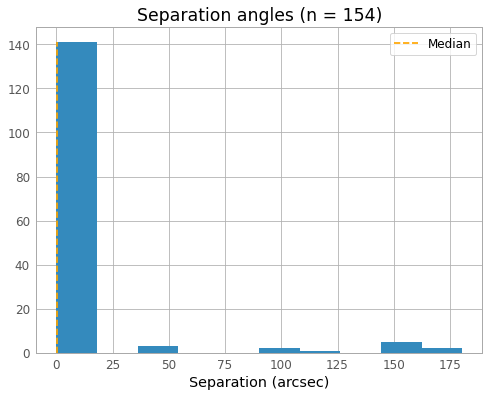

In [681]:
plt.hist(seps, bins=10)
counts, bin_edges = np.histogram(seps, bins=10)
plt.vlines(np.median(seps), 0, counts.max(), color='orange', ls='--', label='Median')
plt.xlabel('Separation (arcsec)')
plt.title('Separation angles (n = {})'.format(len(seps)))
plt.legend()

In [684]:
np.median(seps)

0.17937520699056525

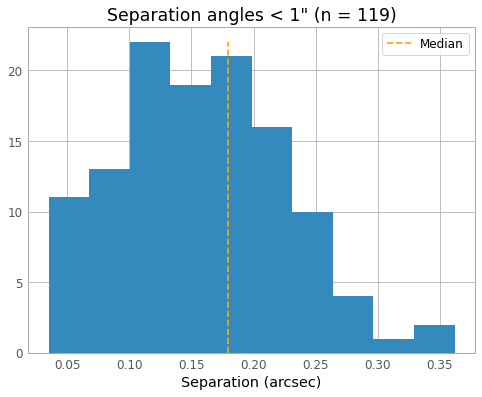

In [685]:
plt.hist(seps[seps < 1], bins=10)
counts, bin_edges = np.histogram(seps[seps < 1], bins=10)
plt.vlines(np.median(seps[seps < 1]), 0, counts.max(), color='orange', ls='--', label='Median')
plt.xlabel('Separation (arcsec)')
plt.title('Separation angles < 1" (n = {})'.format(len(seps[seps < 1])))
plt.legend()

In [660]:
w = WCS(ref_header)
ramin, decmin = w.wcs_pix2world(0, 0, 1)
ramax, decmax = w.wcs_pix2world(3200,3200,1)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [661]:
print(ramin,ramax)
print(decmin,decmax)

184.667613604549 186.6020839510833
65.84300515066535 64.87864678467584


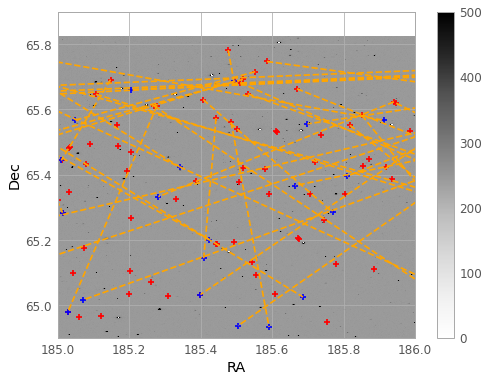

In [665]:
plt.figure()
plt.imshow(ref_data, interpolation='none', extent=[ramin,ramax,decmin,decmax], origin='lower', cmap='Greys', clim=(0,500), aspect='auto')
plt.colorbar()
plt.scatter(ref_cata["ALPHA_SKY"][ref_cata.index.isin(ind)], ref_cata["DELTA_SKY"][ref_cata.index.isin(ind)], color='r', marker='+')
plt.scatter(sci_cata["ALPHA_SKY"][sci_cata.index.isin(ind)], sci_cata["DELTA_SKY"][sci_cata.index.isin(ind)], color='b', marker='+')

for x1, y1, x2, y2 in zip(ref_cata["ALPHA_SKY"][ref_cata.index.isin(ind)], ref_cata["DELTA_SKY"][ref_cata.index.isin(ind)],
                          sci_cata["ALPHA_SKY"][sci_cata.index.isin(ind)], sci_cata["DELTA_SKY"][sci_cata.index.isin(ind)]):
    plt.plot([x1,x2],[y1,y2], color='orange', ls='--')

plt.xlim(185,186)
plt.ylim(64.9,65.9)
plt.xlabel('RA')
plt.ylabel('Dec');